# Case Study 4.1 - Movies

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color:red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# BEGINNER PYTHON

As this is a beginner version, we include a lot of code here to help you along the way.

**First, fill in your identification information below. Then, you only have to type in the answers to the questions we ask you. For the rest of the cells, just Run them by pressing the "Run" button above.**

# Identification Information

You can find your MITxPro username on this [page](https://courses.xpro.mit.edu/courses/course-v1:xPRO+DSx+R14/progress) and copying the username in quotations after it says "Student". For example, Kevin's username is "kevin-lyons".

**Please use the correct username and the e-mail address right next to it as it makes it much easier for course staff to identify your notebook.**

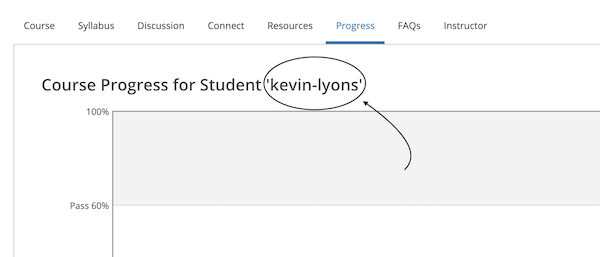

**YOUR NAME**              = Ryan Moschitto 

**YOUR MITX PRO USERNAME** = ryan-a-moschitto

**YOUR MITX PRO E-MAIL**   = RYAN.MOSCHITTO1@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [ ]:
!pip install --upgrade pip
!pip install surprise==0.1

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)


If you do not see any red text, then the install was successful. Yellow text is just warnings, not errors.

# Import

Import the required tools into the notebook.

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import scipy.stats as stats
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
%matplotlib inline
print('Imports successful!')

Imports successful!


# Data

Load the MovieLens data. A dialog may pop up saying **"Dataset ml-100k could not be found. Do you want to download it? [Y/n]"** Type Y and hit Enter to start the download process.

In [ ]:
data = Dataset.load_builtin('ml-100k')
print('\n\nData load successful!')



Data load successful!


We also want to get a sense of what the data looks like. Let's create a histogram of all the ratings we have in the dataset.



Histogram generation successful!


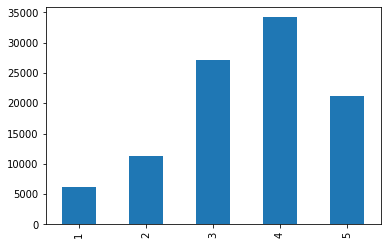

In [ ]:
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Get the rating column
ratings = raw_data.rating

# 4. Generate a bar plot/histogram of that data
ratings.value_counts().sort_index().plot.bar()

print('\n\nHistogram generation successful!')

In [ ]:
#Attempt to visulize data in python, find count of each bin, quartiles, mean and median
raw_data.head(n=3)
raw_data.describe
raw_data["rating"].mean()

3.52986

In [ ]:
#Attempt to visulize data in python, find count of each bin, quartiles, mean and median
print(raw_data["rating"].median())
print(raw_data["rating"].mode())
raw_data["rating"].describe()

4.0
0    4
dtype: int64


count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
#Attempt to visulize data in python, find count of each bin, quartiles, mean and median
raw_data["rating"].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

There are 100,000 entries of ratings ranging from 1 to 5 in this dataset from MovieLens (1,2,3,4,5). Additionally, we are given a time stamp, user ID, and item ID for each rating. The dataset, according to the source: https://grouplens.org/datasets/movielens/100k/, is 100,000 ratings from 1000 users on 1700 movies. This data was released in April of 1998.

A visual inspection from the histogram reveals that the data does not look symmetric and therefore not normal. Instead, it seems to have more ratings above 3. I ran summary statistics and a count to reinforce the visual description provided by the histogram. The most frequent rating is 4, followed by 3,5,2,1 in counts shown above. The median rating is 4.0, the mean is 3.52985, this suggests a negative skewness or left skew. If following are hypotheses that could be investigated: these numbers might suggest that users tend to rate movies when the really enjoy them (4 or 5) and may not waste time to rate them if they do not (1 or 2). The movie selected is a collection of movies that generally liked (3, 4, 5) as opposed to disliked (1 or 2). This might be credit to the curator or  business strategy to acquire rights or offering of movies that already have passed some initial screening so not to waste money on initially screened and poorly rated movies. 

Also, it is worth noting we only observe 1,2,3,4, or 5s. This means there were not any errors in recording ratings (i.e. 0s or 6s or a non-discrete rating i.e. 3.5)

# Model 1: Random

In [ ]:
# Create model object
model_random = NormalPredictor()
print('Model creation successful!')

Model creation successful!


In [ ]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5331  1.5208  1.5212  1.5244  1.5205  1.5240  0.0048  
Fit time          0.12    0.15    0.16    0.15    0.15    0.15    0.01    
Test time         0.15    0.14    0.22    0.14    0.22    0.17    0.04    


Model training successful!


# Model 2: User-Based Collaborative Filtering

In [ ]:
# Create model object
model_user = KNNBasic(sim_options={'user_based': True})
print('Model creation successful!')

Model creation successful!


In [ ]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9748  0.9805  0.9788  0.9732  0.9856  0.9786  0.0044  
Fit time          0.39    0.41    0.39    0.39    0.42    0.40    0.01    
Test time         3.55    3.69    3.64    3.69    3.55    3.62    0.06    


Model training successful!


# Model 3: Item-Based Collaborative Filtering

In [ ]:
# Create model object
model_item = KNNBasic(sim_options={'user_based': False})
print('Model creation successful!')

Model creation successful!


In [ ]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9714  0.9818  0.9843  0.9706  0.9618  0.9740  0.0081  
Fit time          0.57    0.61    0.58    0.59    0.60    0.59    0.01    
Test time         4.01    4.05    4.11    4.21    4.25    4.13    0.09    


Model training successful!


<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

Before looking at the results, and basing a judgment on the modules before this cast study, I would expect to see a user-based filtering perform better than item-based since we are dealing with a big data set of 100,000 ratings. Item-based collaborative filtering should perform better on smaller datasets. User-based filtering is used to find similar users based on preference or consumption and then provide recommendations based on similar user ratings of movies. Whereas item-based would find similarity between movies to determine whether a user would like it or not. However, class Module 4.6 suggested item personalization might perform better when popular movies have many ratings and less popular movies have sparse ratings. This would allow those popular movies to have more collisions and more accuracy in measuring similarity between items or popular movies.  

Looking at the models created, the RMSE mean are as follows…Random = 1.5240, User-Based = 0.9786, Item-Based = 0.9740. ***This means both our User and Item based models perform better than random. That is good! However, our item-based model only slightly performs better than user-based model.*** In fact, I would argue that they virtually perform the same and this variation is dependent on how the data was split to train the model and test it. It is important to point out that these methods only use ratings to find similarity (not profiles of user age, genre, or other characteristics…Super Cool!) So, users would be rated as similar if they give similar ratings to the same movies. Since item-based performed just slightly better, this might mean the data for items may have provided more collisions on the same movies to better estimate similar items. Other factors that may have affected user or item based models would be the breakdown of users rating more movies, or did they pretty much rate the same number of movies? Of those ratings, were they similar or different across users? Were those movies more popular or less popular and what was the spread of ratings? I do not know how to code in python yet to answer that, but those questions are ones I would try to find answers to determine which model should perform better. I also would have expected similarity between users to be more dynamic or change more rapidly than similarity between items, which I would expect is more static. But maybe the training sets had alot overlap in users and items and that is why they are virtually the same. 


# Model 4: Matrix Factorization

In [ ]:
# Create model object
model_matrix = SVD()
print('Model creation successful!')

Model creation successful!


In [ ]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may take some time (2-3 minutes) to train, so please be patient
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9347  0.9391  0.9445  0.9318  0.9355  0.9371  0.0044  
Fit time          7.47    5.11    5.08    5.20    5.10    5.59    0.94    
Test time         0.27    0.14    0.15    0.14    0.14    0.17    0.05    


Model training successful!


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

Matrix factorization is a way to break down the larger matrix into smaller ones to find an underlying mathematical structure to help us find the missing ratings for future predictions.  Here we are breaking down a large matrix into a product of smaller ones like a principal component decomposition, but in this case for movies (ratings and users). Again, using the 5 fold cross-validation, we have reduced the mean RMSE to 0.9371 making the Matrix Factorization the best model to use compared to the Random = 1.5240, User-Based = 0.9786, Item-Based = 0.9740. I cannot quite tell, but I think this python method used the impute method to fill in the missing values; however, this could introduce bias from the observed data due to the sparse original matrix. I think the method used is taking the observed ratings and users to minimize the RMSE through the technique of singular value decomposition. This has an issue of possibly overfitting the data. Either way, the Matrix Factorization is using a low-rank matrix to find features or principals, which is completely different than finding similarity between items or users in the models above or just random assignment.
Since the Matrix factorization is utilizing SVD, it can overcome some issues with Collaborative Filtering and achieve the lowest RMSE. User-User or Item-item models have cold start issues when new users or items are added. Data sparsity can exacerbate the cold start issue and lower the quality of the user or item based recommendations. While collaborative filtering does not require features, matrix factorization is extracting those features based on the partially filled matrix to make recommendations.  


# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k). **Make sure you run this cell.**

In [ ]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('Function creation successful!')

Function creation successful!


Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

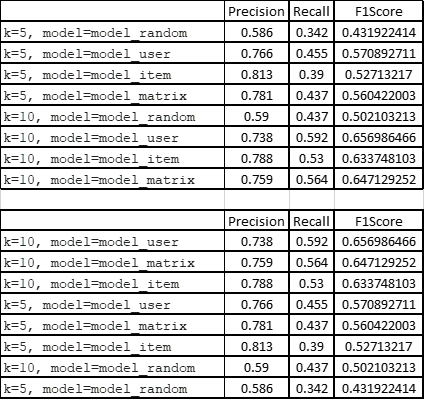

Above is a picture of two tables summarizing the precision and recall outputs. Precision is the positive predictive value, the fraction of relevant instances among the retrieved instances. Recall is the sensitivity or fraction of the total amount of relevant instances that were retrieved. Both should be between 0 and 1, and usually when we increase recall, we decrease precision. I found the harmonic mean of precision and recall finding the F1 Score to compare these 8 models. The second table has the same 8 models sorted from largest to smallest F1 score to compare the 8 models. Notice the two random models had the lowest F1 score just like they had the lowest RMSE shown in item-item and user-user. When comparing to RMSE order to the F1 score RMSE had Matrix, Item, User, Random…F1 Score has User, Matrix, Item, Random, …Precision k=5 has Item, Matrix, User, Random…Recall k=5 has User, Matrix, Item, Random. Also, this second table shows the k=10 models all performing better than the k=5 with regards to the F1 score.

In [ ]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]
model_names = ['model_random', 'model_user', 'model_item', 'model_matrix']

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for i, model in enumerate(models):
        print(f'>>> k={k}, model={model_names[i]}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))
        print('\n')

print('\n\nPrecision and recall computation successful!')

>>> k=5, model=model_random
>>> precision: 0.586
>>> reccall  : 0.342


>>> k=5, model=model_user
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.766
>>> reccall  : 0.455


>>> k=5, model=model_item
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.813
>>> reccall  : 0.39


>>> k=5, model=model_matrix
>>> precision: 0.781
>>> reccal

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [ ]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Function creation successful!')

Function creation successful!


Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

In [ ]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('Trainset and testset creation successful!')

Trainset and testset creation successful!


<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

A cursory review shows the top n predictions pass muster in the sense that 4.3 is the lowest rating recommendation. What’s a little shocking is the random model recommended 5 movies with a rating of 5. The User model recommended another 5 movies with rating of 5, but there was no overlap in the movies. Both models had 5 different movies. The item model recommended a different set of 5 movies with 4.67, 4.5, 4.5, 4.33, and 4.30 ratings. The matrix model yet again recommended a complete different set of 5 movies with ratings of 4.69, 4.67, 4.59, 4.57, and 4.5. 

A way to use these predictions in the real world is to have multiple recommendation lines. Just like Netflix and Prime do today, they have several lines of recommendations for different reasons (i.e. romcoms, action, tv shows, movies, documentary). There could be 4 lines recommending these 5 different movies on each line. The customer gets to see 20 different recommendations. Then once the user gets past the cold start problem and starts informing each one of these models it will better inform future recommendations. I would argue that even the random model would benefit a recommender system in that it would possibly put something in front of the user that they may watch (and would not have otherwise) that would again help fill the sparse matrix of ratings and allow the item, user, or matrix models to improve with more ratings on a wider array movies. Also by introducing random recommendations, these system can help navigate changes in preferences, changes in time, and find completely new movies the user may not have known they would like.  


In [ ]:
for i, model in enumerate(models):
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model name: {model_names[i]}')
    print(f'user ID: {user}')
    print(f'top 5 movie ID\'s this user would like, sorted by rating highest to lowest: {top_n[user]}')

print('\n\nTop N computation successful! YOU ARE DONE WITH THE CODE!')

model name: model_random
user ID: 196
top 5 movie ID's this user would like, sorted by rating highest to lowest: [('246', 5), ('98', 5), ('88', 5), ('1137', 5), ('181', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model name: model_user
user ID: 196
top 5 movie ID's this user would like, sorted by rating highest to lowest: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model name: model_item
user ID: 196
top 5 movie ID's this user would like, sorted by rating highest to lowest: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
model name: model_matrix
user ID: 196
top 5 movie ID's this user would like, sorted by rating highest to lowest: [('483', 4.698233574163323), ('50', 4.67672353548491), ('114', 4.598658975222539), ('318', 4.572446694215102), ('408', 4.508223601184483)]


Top N computation suc

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.xpro.mit.edu/asset-v1:xPRO+DSx+R14+type@asset+block@4.1_instruction_manual_14.html) to wrap up this case study properly.